**4.7 Part a.**

In [2]:
import statsmodels.api as sm, numpy as np, matplotlib.pyplot as plt

In [5]:
A = np.array([8,7,6,6,3,4,7,2,3,4])
B = np.array([9,9,8,14,8,13,11,5,7,6])

In [6]:
mu_A = np.mean(A)
mu_B = np.mean(B)
mu_A, mu_B

(5.0, 9.0)

In [59]:
X = np.array(np.append(np.zeros(A.shape), np.ones(B.shape)))
y = np.append(A, B) 
X_cons = sm.add_constant(X) # the add_constant function adds an intercept
y, X

(array([ 8,  7,  6,  6,  3,  4,  7,  2,  3,  4,  9,  9,  8, 14,  8, 13, 11,
         5,  7,  6]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.]))

In [44]:
y = [0, 1]
X = [5, 9]
X_cons = sm.add_constant(X)
y,X

([0, 1], [5, 9])

In [60]:
results = sm.GLM(y, X_cons, family = sm.families.Poisson()).fit() # log link is cannonical for Poisson()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -45.175
Date:                Tue, 17 Oct 2017   Deviance:                       16.268
Time:                        13:04:45   Pearson chi2:                     16.0
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6094      0.141     11.380      0.000       1.332       1.887
x1             0.5878      0.176      3.332      0.0

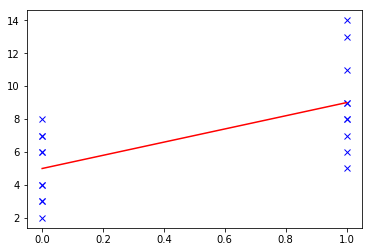

In [66]:
plt.plot(X, y, 'bx', X, results.predict(X_cons), 'r-') # observations in blue, predictions in red
plt.show()

In [64]:
np.exp(results.params[1]), mu_B/mu_A, # results.params[1] is the slope, beta_hat

(1.7999999999999938, 1.8)

Since there are only two categories of a single explanatory variable, the solution becomes a linear regression between the mean of the variables in each category. If the identity link were being used, then the ratio $\frac{\mu_B}{\mu_A}$ would be equal to the slope ($\hat{\beta}$). Since we are using a log link, then $\hat{\beta} = \log\left(\frac{\mu_B}{\mu_A}\right)$. Since the one unit change of the explanatory variable is the difference between the two categories of treatment, an interpretation would be that treatment B is expected to have $\exp(\hat{\beta}) = 1.8$ times as many imprefections as treatment A.

**part b.**

If $H_0: \mu_A = \mu_B$ is true, then $\mu_B/\mu_A = 1$. Since $exp(\beta) = \mu_B/\mu_A$, then $\exp(\beta) = 1$ and $\beta = 0$. Therefore, a test of $H_0: \beta = 0$ is equivalent. 

The coefficient for $\hat{\beta} = 0.5878$ and standard error is 0.176, according to the regression summary from part a. The difference between the test statistic and the null hypothesis value $\left(\frac{\hat{\beta}-0}{SE(\hat{\beta})}\right)$ can be compared to the normal distribution to get the z-score of 3.332 as given in part a. The p-value for this z-score is 0.001. From this low p-score we can reject the null hypothesis ($H_0: \mu_A = \mu_B$) with high confidence.

**part c.**

The 95% confidence interval for $\hat{\beta}$ is given in the regression results summary as $[0.242, 0.933]$. Since $exp(\beta) = \mu_B/\mu_A$, a 95% interval for $ \mu_B/\mu_A$ can be given by

In [67]:
np.exp(0.242), np.exp(0.933)

(1.2737941928161949, 2.5421241218558581)

**part d.**

Both treatment A and treatment B are independent Poisson variates ($Y_1$ and $Y_2$, respectively) with means $\mu_1 = 5, \mu_2 = 9$. Let n = len($Y_1$) + len($Y_2$) = 20, then $Y_1$ ~ $\text{binomial}(\left(20, 5/14\right)$ and $Y_2$ ~ $\text{binomial}(\left(20, 9/14\right)$. Let $\bar{Y_1}$ and $\bar{Y_2}$ designate the sample means of these two binomial distributions, while $\text{Var}(Y_1)$ and $\text{Var}(Y_2)$ are the sample variances.

In [70]:
y1, s1, y2, s2 = 20*5/14, 20*(5/14)**2, 20*9/14, 20*(9/14**2) # Sample mean and variance for treatments A and B
y1, s1, y2, s2

(7.142857142857143, 2.5510204081632653, 12.857142857142858, 0.9183673469387755)

A hypothesis test of $H_0: \mu_A = \mu_B$ becomes equivalent to $H_0: E(y_1) = E(y_2)$. This is a two sample problem of the sort for which the t-test is commonly used. We have no evidence to support the assumptions that variances of the two samples are equal, so Welch's t-test would be an appropriate method of testing. A two sided t-test should be used

Welch's t-test defines a statistic $t = \frac{\bar{Y_1} - \bar{Y_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$. 

Degrees of freedom are estimated by $v = \frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1}+\frac{(s2^2/n_2)^2}{n_2-1}}$.

In [75]:
t_stat, df = (y1-y2)/np.sqrt(s1**2/10+s2**2/10), (s1**2/10+s2**2/10)**2/((s1**2/10)**2/9+(s2**2/10)**2/9)
t_stat, df

(-6.6647778249609084, 11.294265155368011)

In [78]:
from scipy.stats import t
t.cdf(t_stat, df)*2 #p-value for two sided t-test

1.5561061832350494e-05

Given the very small p value, we once again reject the null hypothesis that the means of treatments A and B are equal.